# **PROG8245-Machine Learning Programming**

## **Final Group Project on Sentiment Anamysis**

**Guided By:** 

Prof. Islam Mahmoud


**Prepared By:**

- Harsh Patel - 8885199
- Vishv Patel - 8977662
- Harsh Yadav - 8977229

### **Scrape Data from Reddit**

* Following cell uses the Reddit API to scrape data from the popular network site, 

In [8]:
# Importing the PRAW library for Reddit API interaction
import praw

# User Agent
user_agent = "Scraper 1.0 by /u/Grand-Ad7174"

# Creating a Reddit instance by providing client ID, client secret, and user agent
reddit = praw.Reddit(
    client_id = "-7K2XoueOH4wvgYzEGgSRw",
    client_secret = "R5FaeZgtDVIHXSqKegSqKqZBQAZVsg",
    user_agent = user_agent 
)

**Fetching Different Sentence related to various topic**

In [9]:
subreddits = ['politics', 'OpenAI', 'funny', 'AskReddit', 'gaming', 'worldnews', 'aww', 'MachineLearning', 
              'todayilearned', 'Music', 'Movies', 'science', 'memes',
              'pics', 'Showerthoughts', 'Jokes', 'news', 'videos', 'space',
              'askscience', 'books', 'DIY', 'EarthPorn', 'food', 'nottheonion',
              'mildlyinteresting', 'explainlikeimfive', 'LifeProTips', 'IAmA',
              'Art', 'gadgets', 'GetMotivated', 'gifs', 'sports', 'dataisbeautiful',
              'Documentaries', 'Futurology','UpliftingNews', 'photoshopbattles', 'personalfinace']

# Create an empty set to store unique submission titles
headlines=set()

for subreddit_name in subreddits:
    for submission in reddit.subreddit(subreddit_name).top(limit=None):
        headlines.add(submission.title)

print(len(headlines))

38253


**Insights**

* This code provide 38,253 Headlines from different topic such as politics, OpenAI, funny and many more, which is fetched from reddit.

**Getting them in Data Frame**

In [10]:
import pandas as pd

# Creating a DataFrame from the set of headlines
df = pd.DataFrame(headlines)
df.head()

,0
0,Buried my dad today. He worked for Mississippi...
1,Satellite Imagery of 2017 Solar Eclipse
2,PsBattle: Gucci Mane holding an inflatable Guc...
3,[D] How do ML researchers make progress when i...
4,[homemade] fudgy brownies


In [11]:
df.shape

(38253, 1)

**Insights**

* Above code create the dataframe for the data collected from reddit and create 38,253 rows.

### **Annotate the dataset using `SentimentIntensityAnalyzer`**

The SentimentIntensityAnalyzer class provides a method called polarity_scores() that takes a piece of text as input and returns a dictionary containing the sentiment scores for the text. The dictionary contains four keys: neg, neu, pos, and compound.

* neg: the negative sentiment score (between 0 and 1)
* neu: the neutral sentiment score (between 0 and 1)
* pos: the positive sentiment score (between 0 and 1)
* compound: the overall sentiment score (between -1 and 1)

In [12]:
from nltk.sentiment.vader import SentimentIntensityAnalyzer as SIA
from pprint import pprint

sia = SIA()
results = []

for line in headlines:
    pol_score = sia.polarity_scores(line)
    pol_score['headlines'] = line
    results.append(pol_score)

pprint(results[:3], width=100)

[{'compound': -0.3612,
  'headlines': 'Buried my dad today. He worked for Mississippi Power for over 30 years so they '
               'sent bucket trucks to his funeral.',
  'neg': 0.111,
  'neu': 0.889,
  'pos': 0.0},
 {'compound': 0.0,
  'headlines': 'Satellite Imagery of 2017 Solar Eclipse',
  'neg': 0.0,
  'neu': 1.0,
  'pos': 0.0},
 {'compound': 0.0,
  'headlines': 'PsBattle: Gucci Mane holding an inflatable Gucci Mane',
  'neg': 0.0,
  'neu': 1.0,
  'pos': 0.0}]


In [13]:
df = pd.DataFrame.from_records(results)
df.head()

,neg,neu,pos,compound,headlines
0,0.111,0.889,0.000,-0.3612,Buried my dad today. He worked for Mississippi...
1,0.000,1.000,0.000,0.0000,Satellite Imagery of 2017 Solar Eclipse
2,0.000,1.000,0.000,0.0000,PsBattle: Gucci Mane holding an inflatable Guc...
3,0.000,0.859,0.141,0.4215,[D] How do ML researchers make progress when i...
4,0.000,1.000,0.000,0.0000,[homemade] fudgy brownies


The compound score is a metric used in sentiment analysis that represents the sum of all lexicon ratings, normalized between `-1` (most extreme negative) and `+1` (most extreme positive). 

The code categorizes the sentiment into three types:
* `1` for Positive sentiment: where the compound score is greater than `0.05`.
* `0` for Neutral sentiment: where the compound score is between `-0.05` and `0.05`.
* `-1` for Negative sentiment: where the compound score is less than `-0.05`.

In [14]:
df['label'] = 0
df.loc[df['compound'] > 0.05, 'label'] = 1
df.loc[df['compound'] < -0.05, 'label'] = -1
display(df.head())

,neg,neu,pos,compound,headlines,label
0,0.111,0.889,0.000,-0.3612,Buried my dad today. He worked for Mississippi...,-1
1,0.000,1.000,0.000,0.0000,Satellite Imagery of 2017 Solar Eclipse,0
2,0.000,1.000,0.000,0.0000,PsBattle: Gucci Mane holding an inflatable Guc...,0
3,0.000,0.859,0.141,0.4215,[D] How do ML researchers make progress when i...,1
4,0.000,1.000,0.000,0.0000,[homemade] fudgy brownies,0


In [15]:
df2 = df[['headlines', 'label']]
df2.head()

,headlines,label
0,Buried my dad today. He worked for Mississippi...,-1
1,Satellite Imagery of 2017 Solar Eclipse,0
2,PsBattle: Gucci Mane holding an inflatable Guc...,0
3,[D] How do ML researchers make progress when i...,1
4,[homemade] fudgy brownies,0


**Saving the Processed DataFrame in CSV file**

In [16]:
df2.to_csv('Sentimental_Analysis.csv', encoding='utf-8', index=False)
df.label.value_counts()

label
 0    16544
 1    11733
-1     9976
Name: count, dtype: int64

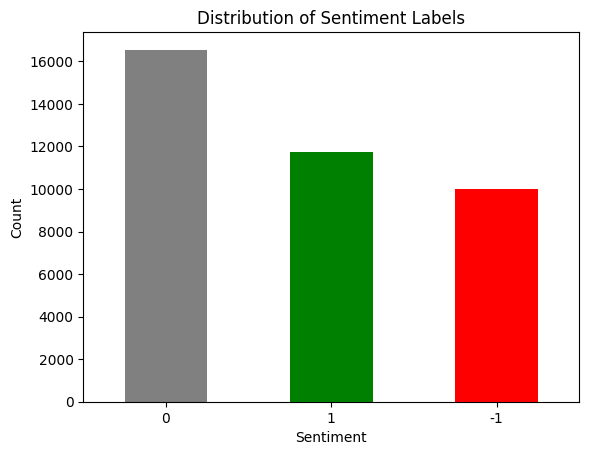

In [17]:
import matplotlib.pyplot as plt

# Get the counts of each label
label_counts = df2['label'].value_counts()

# Plotting
label_counts.plot(kind='bar', color=['grey', 'green', 'red'])
plt.title('Distribution of Sentiment Labels')
plt.xlabel('Sentiment')
plt.ylabel('Count')
plt.xticks(rotation=0)  
plt.show() 


* The graph provides a visual representation of sentiment analysis results, indicating the distribution of sentiment lables.

### **1. Load the Data**

In [2]:
import pandas as pd

data = pd.read_csv('Sentimental_Analysis.csv')
data.head()

,headlines,label
0,Buried my dad today. He worked for Mississippi...,-1
1,Satellite Imagery of 2017 Solar Eclipse,0
2,PsBattle: Gucci Mane holding an inflatable Guc...,0
3,[D] How do ML researchers make progress when i...,1
4,[homemade] fudgy brownies,0


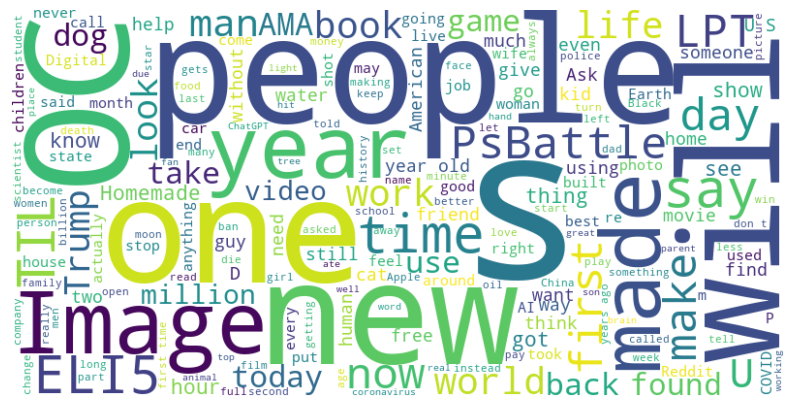

In [3]:
from wordcloud import WordCloud
import matplotlib.pyplot as plt

# Assuming your text data is stored in a column named 'text', replace 'text' with the actual column name
text_data = ' '.join(data['headlines'])

# Generate word cloud
wordcloud = WordCloud(width=800, height=400, background_color='white').generate(text_data)

# Display word cloud
plt.figure(figsize=(10, 6))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.show()


* This is a visualization where the size of each word in the word cloud corresponds to its frequency in the 'headlines' column of the DataFrame. 
* It provides a quick and intuitive way to visualize the most common words in the text data.

### **2. Preprocessing the Data**

In [4]:
import nltk
from nltk.corpus import stopwords, wordnet
from nltk.tokenize import word_tokenize
from nltk.stem import WordNetLemmatizer
import re, emoji, string

In [6]:
def preprocess_text(text):
    def replace_slang(text):
        words = text.split()
        replaced_words = []
        for word in words:
            synsets = wordnet.synsets(word)
            if synsets:
                replaced_words.append(synsets[0].lemmas()[0].name())
            else:
                replaced_words.append(word)
        return ' '.join(replaced_words)
    
    # Handle hashtags
    text = re.sub(r'#\w+', '', text)
    
    # Handle emojis
    text = emoji.demojize(text)
    
    # Replace slang words
    text = replace_slang(text)
    
    # Tokenization
    tokens = word_tokenize(text)

    # Lowercasing
    tokens = [token.lower() for token in tokens]
    
    # Negation handling
    negation_words = set(['not', 'no', 'never', 'none', 'neither', 'nor', 'cannot'])
    negated = False
    negation_scope = False

    for i in range(len(tokens)):
        if tokens[i] in negation_words:
            negated = True
            negation_scope = True
        elif negation_scope:
            if tokens[i] in string.punctuation:
                negation_scope = False
            else:
                tokens[i] += "_NEG"
        if negated and tokens[i] in string.punctuation:
            negated = False

    # Remove punctuation
    punctuation_list = string.punctuation
    tokens = [word for word in tokens if word not in punctuation_list]

    # POS tagging
    pos_tags = nltk.pos_tag(tokens)

    # Lemmatization
    lemmatizer = WordNetLemmatizer()
    lemmatized_tokens = []
    lemmatize_exceptions = set(['not', 'no', 'never', 'none', 'neither', 'nor', 'cannot'])  # Add more exceptions as needed

    for word, pos in pos_tags:
        if word not in lemmatize_exceptions:
            if pos.startswith('N'):  # N for Noun
                lemmatized_tokens.append(lemmatizer.lemmatize(word, pos='n'))
            elif pos.startswith('V'):  # V for Verb
                lemmatized_tokens.append(lemmatizer.lemmatize(word, pos='v'))
            elif pos.startswith('J'):   # J for Adjective
                lemmatized_tokens.append(lemmatizer.lemmatize(word, pos='a'))
            elif pos.startswith('R'):   # R for Adverb
                lemmatized_tokens.append(lemmatizer.lemmatize(word, pos='r'))
            else:
                lemmatized_tokens.append(word)
        else:
            lemmatized_tokens.append(word)

    lemmatized_text = ' '.join(lemmatized_tokens)

    return lemmatized_text


In [7]:
# Apply preprocessing function to the 'headlines' column
data['lemmatized_tokens'] = data['headlines'].apply(preprocess_text)

display(data.head())


,headlines,label,lemmatized_tokens
0,Buried my dad today. He worked for Mississippi...,-1,bury my dad today helium work for mississippi ...
1,Satellite Imagery of 2017 Solar Eclipse,0,satellite imagination of 2017 solar eclipse
2,PsBattle: Gucci Mane holding an inflatable Guc...,0,psbattle gucci mane retention associate_in_nur...
3,[D] How do ML researchers make progress when i...,1,d how bash milliliter research_worker brand ad...
4,[homemade] fudgy brownies,0,homemade fudgy brownie


* The above code defines a function called preprocess_text that preprocesses text data by performing various steps such as handling hashtags, emojis, slang words, tokenization, lowercasing, stop-word removal, punctuation removal, POS tagging, and lemmatization.
* Then, the function is applied to the 'headlines' column of a DataFrame called data. The preprocessed text data, as well as the POS tags, are stored in new columns named 'lemmatized_tokens' and 'pos_tags', respectively.
* Finally, the first few rows of the DataFrame data are displayed to show the results of preprocessing.

In [8]:
print(data.shape)

(38253, 3)


### **3. Feature Extraction**

In [9]:
import os
os.environ['HF_HUB_DISABLE_SYMLINKS_WARNING'] = '1'

* This code sets an environment variable called 'HF_HUB_DISABLE_SYMLINKS_WARNING' to '1'.
* The variable name suggests that it's related to the Hugging Face Hub, which is a repository of pre-trained models and datasets for natural language processing tasks.
* The value '1' likely disables a specific warning related to symlinks (symbolic links) in the Hugging Face Hub. Symbolic links are a type of file that contains a reference to another file or directory in the form of an absolute or relative path.

**TF-IDF vectorizer**

* TF-IDF stands for Term Frequency-Inverse Document Frequency. It is a numerical statistic that reflects the importance of a word in a document relative to a collection of documents (corpus).

* It is calculated as the product of TF and IDF. It gives higher weight to terms that are frequent in a document but rare in the corpus, hence identifying words that are particularly important in a document.

In [11]:
from sklearn.feature_extraction.text import TfidfVectorizer
from gensim.models import Word2Vec
from transformers import BertTokenizer, BertModel
import numpy as np

# TF-IDF
tfidf_vectorizer = TfidfVectorizer()
tfidf_features = tfidf_vectorizer.fit_transform(data['lemmatized_tokens'])
tfidf_features


<38253x31897 sparse matrix of type '<class 'numpy.float64'>'
	with 563796 stored elements in Compressed Sparse Row format>

* The TF-IDF matrix contains numerical representations of the text data in a format suitable for machine learning algorithms.
* Each row in the TF-IDF matrix corresponds to a document or sample, while each column represents a unique term (word) in the entire corpus.
* The shape of the TF-IDF matrix provides insights into the dimensionality of the feature space used for modeling.
* With 38,253 samples and 31,897 features, the TF-IDF matrix represents a high-dimensional space where each document is represented by a vector of TF-IDF scores for each unique term in the corpus.

**Word2Vec**

In [15]:
# Word2Vec
word2vec_model = Word2Vec(data['lemmatized_tokens'], vector_size=2000, window=5, min_count=1, workers=4)
word2vec_features = np.array([np.mean([word2vec_model.wv[word] for word in tokens if word in word2vec_model.wv] or [np.zeros(2000)], axis=0) for tokens in data['lemmatized_tokens']])
word2vec_features

array([[ 0.00474499,  0.00893528, -0.00539092, ..., -0.0327354 ,
         0.01095888,  0.01115285],
       [-0.00644996,  0.01738875, -0.02960969, ..., -0.04647793,
         0.02038844,  0.00249113],
       [-0.00953375,  0.03947346, -0.05114955, ..., -0.02756696,
         0.01994311,  0.01341474],
       ...,
       [ 0.00274121,  0.00925317, -0.00994193, ..., -0.03086816,
         0.02080204,  0.01004034],
       [-0.00191469,  0.01698387, -0.02618732, ..., -0.03206677,
         0.01507273,  0.011361  ],
       [ 0.00606959, -0.00359107,  0.01837406, ..., -0.03923626,
         0.00483233,  0.00710604]])

* Word2Vec features represent each document in a continuous vector space where similar words are represented by vectors that are closer together.
* The Word2Vec feature matrix provides dense representations of documents in a lower-dimensional space compared to the TF-IDF matrix.
* With 38,253 samples and 2000 features, the Word2Vec feature matrix represents a lower-dimensional space compared to TF-IDF, capturing semantic relationships between words.

**BERT**

**WordPiece Tokenization:** BERT uses a tokenization technique called WordPiece, which breaks words into smaller subwords or pieces. This helps BERT handle rare or out-of-vocabulary words by representing them as combinations of subwords.

**Tokenization Process:** The BERT tokenizer takes a piece of text as input and breaks it into individual tokens. It also adds special tokens to mark the beginning and end of a sentence, as well as to handle sentence pairs in tasks like sentence classification or question answering.

In [13]:
# BERT
tokenizer = BertTokenizer.from_pretrained('bert-base-uncased')
model = BertModel.from_pretrained('bert-base-uncased')
bert_features = []

for text in data['lemmatized_tokens']:
    inputs = tokenizer(text, return_tensors='pt', padding=True, truncation=True)
    outputs = model(**inputs)
    pooled_output = outputs.pooler_output
    bert_features.append(pooled_output.detach().numpy())

bert_features = np.vstack(bert_features)
bert_features

array([[-0.6803521 , -0.22863173, -0.30975458, ...,  0.11731034,
        -0.4962748 ,  0.80746704],
       [-0.927238  , -0.39990902, -0.52654374, ..., -0.41057387,
        -0.54473966,  0.86575395],
       [-0.7612647 , -0.36798233, -0.7502388 , ..., -0.45371917,
        -0.57391864,  0.681851  ],
       ...,
       [-0.738617  , -0.3268889 , -0.668278  , ..., -0.5984937 ,
        -0.63773257,  0.71363634],
       [-0.7816017 , -0.4317663 , -0.93149006, ..., -0.7000197 ,
        -0.7027373 ,  0.66730314],
       [-0.5796267 , -0.40161756, -0.58075106, ..., -0.72249484,
        -0.58122903,  0.6056825 ]], dtype=float32)

* BERT features represent each document in a 768-dimensional vector space, capturing the contextual information of the text.
* BERT is a powerful language model that is pre-trained on large corpora and can capture intricate relationships between words and their contexts.
* The BERT feature matrix provides dense representations of documents suitable for various downstream NLP tasks such as classification, clustering, or regression.
* The 768-dimensional BERT feature vectors represent a compact yet rich representation of the text data, enabling effective modeling of semantic relationships.

In [16]:
print("TF-IDF Features shape:", tfidf_features.shape)
print("Word2Vec Features shape:", word2vec_features.shape)
print("BERT Features shape:", bert_features.shape)

TF-IDF Features shape: (38253, 31897)
Word2Vec Features shape: (38253, 2000)
BERT Features shape: (38253, 768)


### **4. Model Selection and Training**

In [18]:
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score

**Splitting the Dataset**

In [19]:
# Splitting the dataset
X_tfidf = tfidf_features
X_word2vec = word2vec_features
X_bert = bert_features
y = data['label']
X_tfidf_train, X_tfidf_test, y_train, y_test = train_test_split(X_tfidf, y, test_size=0.2, random_state=42)
X_word2vec_train, X_word2vec_test, _, _ = train_test_split(X_word2vec, y, test_size=0.2, random_state=42)
X_bert_train, X_bert_test, _, _ = train_test_split(X_bert, y, test_size=0.2, random_state=42)

* The code efficiently splits the dataset into training and testing sets for each type of feature representation: TF-IDF, Word2Vec, and BERT.
* By splitting the dataset, it enables the evaluation of machine learning models on each type of feature independently.
* Using a consistent random_state value (42 in this case) ensures reproducibility of the results across different runs.
* The choice of the test size (20% in this case) balances the trade-off between having sufficient data for training and having enough data for testing the model's performance.

#### **I. TF-IDF Feature**

##### **SVM model using TF-IDF features**

* Support Vector Machine (SVM) is a supervised machine learning algorithm that is used for classification and regression tasks. In the context of classification, SVM finds the optimal hyperplane that best separates different classes in the feature space. 

In [20]:
# Training and evaluating SVM model for TF-IDF features
svm_tfidf = SVC(kernel='linear', random_state=42)
svm_tfidf.fit(X_tfidf_train, y_train)

SVC(kernel='linear', random_state=42)

In [21]:
# Make prediction
y_train_pred_tfidf_svm = svm_tfidf.predict(X_tfidf_train)
y_test_pred_tfidf_svm = svm_tfidf.predict(X_tfidf_test)

# Checking Accuracy
accuracy_train_tfidf_svm = accuracy_score(y_train, y_train_pred_tfidf_svm)
accuracy_test_tfidf_svm = accuracy_score(y_test, y_test_pred_tfidf_svm)

print("SVM model Accuracy using TF-IDF Feature (Training):", accuracy_train_tfidf_svm)
print("SVM model Accuracy using TF-IDF Feature (Testing):", accuracy_test_tfidf_svm)

SVM model Accuracy using TF-IDF Feature (Training): 0.9115744069015097
SVM model Accuracy using TF-IDF Feature (Testing): 0.8082603581231211


* The SVM model achieves a high accuracy of approximately 91.15% on the training data, indicating that it has learned the patterns present in the training set well.
* The accuracy on the testing data is slightly lower at approximately 80.82%. This suggests that the model generalizes reasonably well to unseen data.

**Evaluation on SVM model for TF-IDF feature**

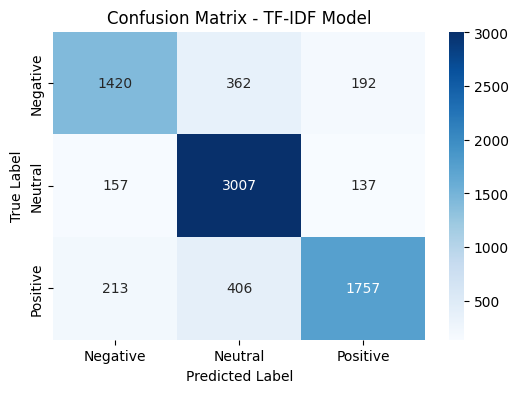

In [34]:
from sklearn.metrics import confusion_matrix
import seaborn as sns

# Calculate confusion matrix
conf_matrix_tfidf = confusion_matrix(y_test, y_test_pred_tfidf_svm)

# Plot confusion matrix
plt.figure(figsize=(6, 4))
sns.heatmap(conf_matrix_tfidf, annot=True, fmt='d', cmap='Blues', 
            xticklabels=['Negative', 'Neutral', 'Positive'], 
            yticklabels=['Negative', 'Neutral', 'Positive'])
plt.title('Confusion Matrix - TF-IDF Model')
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.show()


The confusion matrix represents the performance of a model. Let’s analyze the insights from this confusion matrix:

1. True Positives (TP):<br>
The diagonal elements represent the number of correct predictions for each class.
the diagonal elements are:
* They are Negative and model predict them also as Negative: 1420
* They are Neutral and model predict them also as Neutral: 3007
* They are Positive and model predict them also as Positive: 1757

2. False Positives (FP):<br>
The values outside the diagonal in each row represent the misclassifications.

* The model predicted 362 negative samples as neutral.
* The model predicted 406 positive samples as neutral.
* These misclassifications can provide insights into areas where the model needs improvement.

In [36]:
import pandas as pd
from sklearn.metrics import classification_report

# Classification report for TF-IDF model
report_tfidf = classification_report(y_test, y_test_pred_tfidf_svm, output_dict=True, zero_division=1)
df_tfidf = pd.DataFrame(report_tfidf).transpose()
df_tfidf.index.name = 'TF-IDF Model'

# Display DataFrames
print("TF-IDF Model using SVM Report:")
display(df_tfidf)

TF-IDF Model using SVM Report:


,precision,recall,f1-score,support
TF-IDF Model,,,,
-1,0.793296,0.719352,0.754516,1974.00000
0,0.796556,0.910936,0.849915,3301.00000
1,0.842282,0.739478,0.787539,2376.00000
accuracy,0.808260,0.808260,0.808260,0.80826
macro avg,0.810711,0.789922,0.797324,7651.00000
weighted avg,0.809915,0.808260,0.805931,7651.00000


* **Precision:** Precision is the ratio of correctly predicted positive observations to the total predicted positives. It measures the accuracy of positive predictions. A higher precision indicates fewer false positives.

* **Recall:** Recall is the ratio of correctly predicted positive observations to all actual positives. It measures the ability of the model to find all relevant cases within the data. A higher recall indicates fewer false negatives.

* **F1-score:** The F1-score is the harmonic mean of precision and recall. It provides a balance between precision and recall. It is a useful metric when the class distribution is imbalanced.

1. Class -1:<br>
Precision: 0.793 (79.3%) - 79.3% of the instances predicted as class -1 were actually class -1.<br>
Recall: 0.719 (71.9%) - The model correctly identified 71.9% of all actual class -1 instances.<br>
F1-score: 0.754 (75.4%) - The harmonic mean of precision and recall for class -1.<br>

2. Class 0:<br>
Precision: 0.796 (79.6%)<br>
Recall: 0.910 (91%)<br>
F1-score: 0.849 (84.9%)<br>

3. Class 1:<br>
Precision: 0.842 (84.2%)<br>
Recall: 0.739 (73.9%)<br>
F1-score: 0.787 (78.7%)<br>

##### **Naive Bayes Model using TF-IDF Feature**

* Naive Bayes is a simple probabilistic classifier based on applying Bayes' theorem with strong (naive) independence assumptions between the features.


In [37]:
from sklearn.naive_bayes import MultinomialNB

# Train Naive Bayes model
naive_bayes_model_tfidf = MultinomialNB()
naive_bayes_model_tfidf.fit(X_tfidf_train, y_train)

# Make predictions
y_train_NB_pred = naive_bayes_model_tfidf.predict(X_tfidf_train)
y_test_NB_pred = naive_bayes_model_tfidf.predict(X_tfidf_test)

# Evaluate model
accuracy_train = accuracy_score(y_train, y_train_NB_pred)
accuracy_test = accuracy_score(y_test, y_test_NB_pred)

print("Naive Bayes Accuracy (Training):", accuracy_train)
print("Naive Bayes Accuracy (Testing):", accuracy_test)

Naive Bayes Accuracy (Training): 0.8279524214103653
Naive Bayes Accuracy (Testing): 0.7073585152267677


* The Naive Bayes model has an accuracy of approximately 82.8% on the training data and 70.7% on the testing data.<br/>
* This suggests the model is performing well on seen data but could potentially be overfitting and may benefit from optimization to improve its generalization to unseen data.

**Evaluation on Naive Bayes Model for TF-IDF feature**

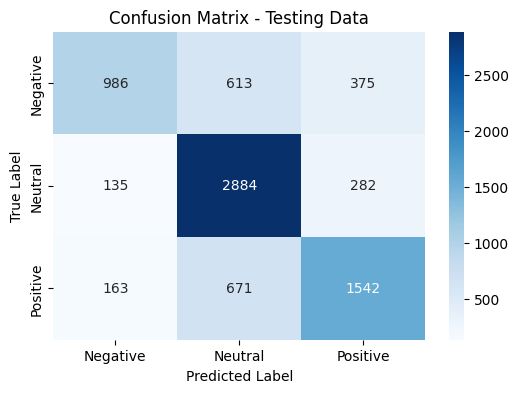

In [38]:
# Calculate confusion matrix for testing data
conf_matrix_test = confusion_matrix(y_test, y_test_NB_pred)

# Plot confusion matrix for testing data
plt.figure(figsize=(6, 4))
sns.heatmap(conf_matrix_test, annot=True, fmt='d', cmap='Blues', 
            xticklabels=['Negative', 'Neutral', 'Positive'], 
            yticklabels=['Negative', 'Neutral', 'Positive'])
plt.title('Confusion Matrix - Testing Data')
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.show()

The confusion matrix you've provided shows the performance of a sentiment analysis model. Here's a short analysis:

- **True Positives (TP)**:
  - **Negative**: Correctly predicted as Negative: 986
  - **Neutral**: Correctly predicted as Neutral: 2884
  - **Positive**: Correctly predicted as Positive: 1542

- **False Positives (FP) and False Negatives (FN)**:
  - **Negative Misclassified**: 613 as Neutral, 375 as Positive
  - **Neutral Misclassified**: 135 as Negative, 282 as Positive
  - **Positive Misclassified**: 163 as Negative, 671 as Neutral

This matrix helps identify how well the model predicts each sentiment and where it may confuse one sentiment for another, indicating potential areas for model improvement.

In [39]:
import pandas as pd
from sklearn.metrics import classification_report

# Generate classification report for Naive Bayes model
report_nb = classification_report(y_test, y_test_NB_pred, output_dict=True, zero_division=1)
df_nb = pd.DataFrame(report_nb).transpose()
df_nb.index.name = 'Naive Bayes Model'

# Display the DataFrame
print("Naive Bayes Model Report:")
display(df_nb)


Naive Bayes Model Report:


,precision,recall,f1-score,support
Naive Bayes Model,,,,
-1,0.767913,0.499493,0.605279,1974.000000
0,0.691939,0.873675,0.772259,3301.000000
1,0.701228,0.648990,0.674098,2376.000000
accuracy,0.707359,0.707359,0.707359,0.707359
macro avg,0.720360,0.674053,0.683879,7651.000000
weighted avg,0.714425,0.707359,0.698694,7651.000000


1. Class -1: <br/> 
Precision: 0.767913 (76.79%) - 76.79% of the instances predicted as class -1 were actually class -1.<br/>
Recall: 0.499493 (49.95%) - The model correctly identified 49.95% of all actual class -1 instances.<br/>
F1-score: 0.605279 (60.53%) - The harmonic mean of precision and recall for class -1.<br/>
2. Class 0:<br/>
Precision: 0.691939 (69.19%)<br/>
Recall: 0.873675 (87.37%)<br/>
F1-score: 0.772259 (77.23%)<br/>
3. Class 1:<br/>
Precision: 0.701228 (70.12%)<br/>
Recall: 0.648990 (64.90%)<br/>
F1-score: 0.674098 (67.41%)<br/>

* The overall accuracy of the model is 70.74%, indicating that it correctly classified this percentage of instances. The macro average F1-score is 68.39%, and the weighted average F1-score is 69.87%. 

##### **Neural Network Model using TF-IDF Feature**

In [23]:
from keras.models import Sequential
from keras.layers import Dense, Dropout
from keras.callbacks import EarlyStopping

# Convert labels to one-hot encoding
num_classes = 3  # Number of classes (positive, negative, neutral)
y_train_one_hot = np.eye(num_classes)[y_train]
y_test_one_hot = np.eye(num_classes)[y_test]

# Define the neural network model
model = Sequential()
model.add(Dense(128, input_dim=tfidf_features.shape[1], activation='relu'))  # Input layer with 128 neurons
model.add(Dropout(0.5))  # Dropout layer with dropout rate of 0.5
model.add(Dense(64, activation='relu'))  # Hidden layer with 64 neurons
model.add(Dropout(0.5))  # Dropout layer with dropout rate of 0.5
model.add(Dense(num_classes, activation='softmax'))  # Output layer with softmax activation for multi-class classification

# Compile the model
model.compile(optimizer='rmsprop', loss='categorical_crossentropy', metrics=['accuracy'])

# Define early stopping callback
early_stopping = EarlyStopping(monitor='val_loss', patience=3, restore_best_weights=True)

# Train the model with early stopping
history = model.fit(X_tfidf_train, y_train_one_hot, epochs=30, batch_size=64, validation_data=(X_tfidf_test, y_test_one_hot), callbacks=[early_stopping])

# Evaluate model
accuracy_train = model.evaluate(X_tfidf_train, y_train_one_hot, verbose=0)[1]
accuracy_test = model.evaluate(X_tfidf_test, y_test_one_hot, verbose=0)[1]

print("Neural Network Accuracy (Training):", accuracy_train)
print("Neural Network Accuracy (Testing):", accuracy_test)


Epoch 1/30


c:\Users\vishv\AppData\Local\Programs\Python\Python311\Lib\site-packages\keras\src\layers\core\dense.py:88: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


479/479 ━━━━━━━━━━━━━━━━━━━━ 5s 10ms/step - accuracy: 0.4995 - loss: 1.0000 - val_accuracy: 0.7413 - val_loss: 0.6750
Epoch 2/30
479/479 ━━━━━━━━━━━━━━━━━━━━ 4s 9ms/step - accuracy: 0.7853 - loss: 0.5878 - val_accuracy: 0.7825 - val_loss: 0.5682
Epoch 3/30
479/479 ━━━━━━━━━━━━━━━━━━━━ 4s 9ms/step - accuracy: 0.8522 - loss: 0.4299 - val_accuracy: 0.7957 - val_loss: 0.5606
Epoch 4/30
479/479 ━━━━━━━━━━━━━━━━━━━━ 4s 9ms/step - accuracy: 0.8847 - loss: 0.3556 - val_accuracy: 0.8041 - val_loss: 0.5470
Epoch 5/30
479/479 ━━━━━━━━━━━━━━━━━━━━ 4s 9ms/step - accuracy: 0.9020 - loss: 0.3123 - val_accuracy: 0.8046 - val_loss: 0.5626
Epoch 6/30
479/479 ━━━━━━━━━━━━━━━━━━━━ 4s 9ms/step - accuracy: 0.9127 - loss: 0.2837 - val_accuracy: 0.8090 - val_loss: 0.5674
Epoch 7/30
479/479 ━━━━━━━━━━━━━━━━━━━━ 4s 9ms/step - accuracy: 0.9235 - loss: 0.2543 - val_accuracy: 0.8063 - val_loss: 0.5895
Neural Network Accuracy (Training): 0.9169661998748779
Neural Network Accuracy (Testing): 0.8040779232978821


* **One-Hot Encoding:** Each label is converted into a binary vector where the index corresponding to the class is set to 1, and all other indices are set to 0.

* **Neural Network Model:** It consists of an input layer with 128 neurons, followed by a dropout layer with a dropout rate of 0.5 to prevent overfitting. This is followed by a hidden layer with 64 neurons and another dropout layer. Finally, the output layer with num_classes neurons and softmax activation is used for multi-class classification.

* **Compilation:** The model is compiled using the 'rmsprop' optimizer and 'categorical_crossentropy' loss function, which is suitable for multi-class classification. The 'accuracy' metric is used to evaluate the model.

* **Early Stopping:** The EarlyStopping callback is used to monitor the validation loss and stop training if the loss does not improve after 3 epochs. This helps prevent overfitting.

**Plotting Training and Validation Sets Accuracy and Loss**

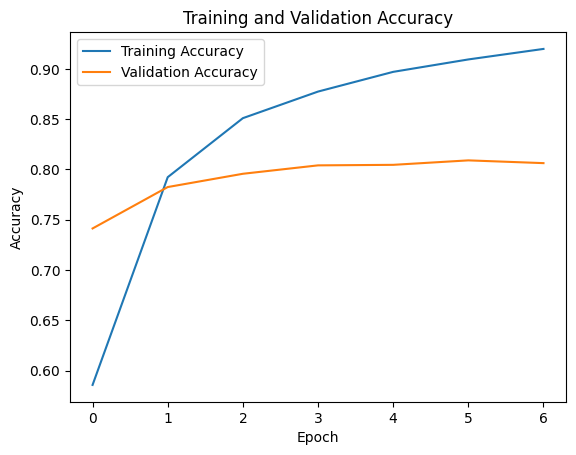

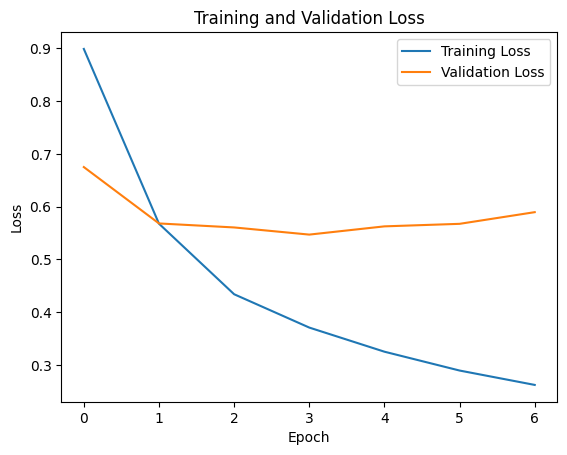

In [24]:
# Plot training and validation accuracy
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.title('Training and Validation Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

# Plot training and validation loss
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Training and Validation Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.show()


* The model achieves an accuracy of approximately 49.95% and a loss of 1.0000 on the training data in the first epoch.<br/>
In the subsequent epochs, the model's performance improves significantly, reaching an accuracy of approximately 92.35% and a loss of 0.2543 on the training data by the seventh epoch.
* On the validation data, the model starts with an accuracy of approximately 74.13% and a loss of 0.6750 in the first epoch, and improves to an accuracy of approximately 80.63% and a loss of 0.5895 by the seventh epoch.
* The increasing accuracy and decreasing loss on both the training and validation data indicate that the model is learning and improving over the epochs.<br/>
The model seems to be performing well, especially considering the significant improvement in accuracy from the initial epoch to the seventh epoch.

#### **Comparision of all Three Models, Which use TF-IDF features**

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


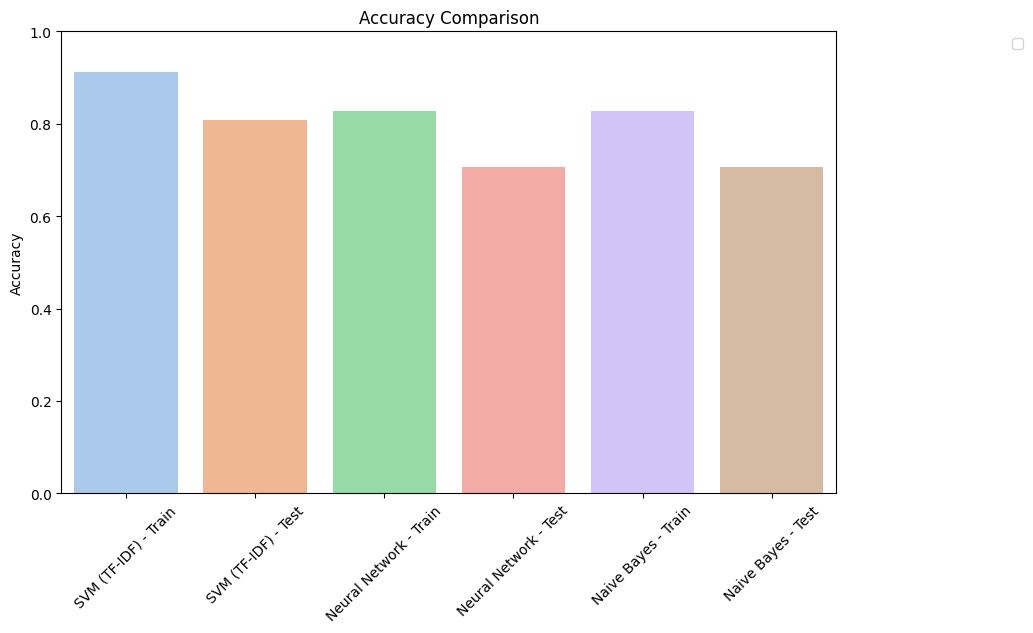

In [54]:
import matplotlib.pyplot as plt
import seaborn as sns

# Accuracy comparison
accuracies = [accuracy_train_tfidf_svm, accuracy_test_tfidf_svm, accuracy_train, accuracy_test, accuracy_train, accuracy_test]
models = ['SVM (TF-IDF) - Train', 'SVM (TF-IDF) - Test', 'Neural Network - Train', 'Neural Network - Test', 'Naive Bayes - Train', 'Naive Bayes - Test']
colors = sns.color_palette('pastel', len(models))  # Generate a color palette

plt.figure(figsize=(10, 6))
sns.barplot(x=models, y=accuracies, hue=models, palette=colors, dodge=False)  # Assign x to hue and set dodge=False
plt.title('Accuracy Comparison')
plt.ylabel('Accuracy')
plt.xticks(rotation=45)
plt.ylim(0, 1)
plt.legend(loc='upper right', bbox_to_anchor=(1.25, 1))  # Set legend position
plt.show()


* SVM (TF-IDF): Shows the highest accuracy in both training and testing, indicating robust performance. <br/>
* Neural Network: Exhibits high accuracy, slightly lower than SVM (TF-IDF), suggesting effective learning but with room for improvement.<br/>
* Naive Bayes: While training accuracy is comparable to the other models, its testing accuracy is significantly lower, which may point to overfitting or a model that doesn’t generalize well to new data.<br/>

**SVM model for Word2Vec features**

In [27]:
# Training and evaluating SVM model for Word2Vec features
svm_word2vec = SVC(kernel='linear', random_state=42)
svm_word2vec.fit(X_word2vec_train, y_train)

# Make prediction
y_train_pred_word2vec = svm_word2vec.predict(X_word2vec_train)
y_test_pred_word2vec = svm_word2vec.predict(X_word2vec_test)

# Checking Accuracy
accuracy_train_word2vec = accuracy_score(y_train, y_train_pred_word2vec)
accuracy_test_word2vec = accuracy_score(y_test, y_test_pred_word2vec)

print("Word2Vec Accuracy (Training):", accuracy_train_word2vec)
print("Word2Vec Accuracy (Testing):", accuracy_test_word2vec)

Word2Vec Accuracy (Training): 0.43797790994052677
Word2Vec Accuracy (Testing): 0.4407267023918442


* The SVM model trained on Word2Vec features achieves a relatively low accuracy of approximately 43.79% on the training data and 44.07% on the testing data.
* The significantly lower accuracy compared to the TF-IDF model suggests that the Word2Vec features may not capture the relevant patterns or semantics as effectively for this classification task.
* It's possible that the Word2Vec model trained on the provided lemmatized tokens did not adequately capture the semantics or context of the text data, leading to poor performance in the SVM classifier.

**Evaluation on SVM model for Word2Vec feature**

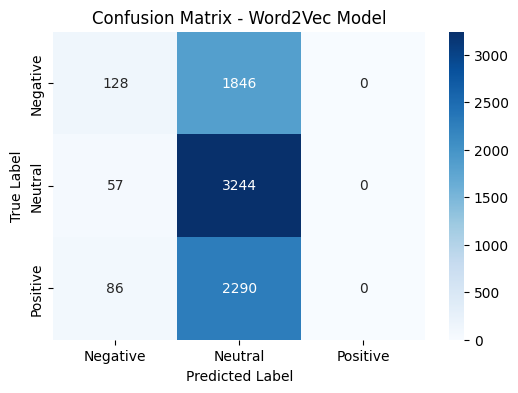

In [55]:
# Calculate confusion matrix for Word2Vec model
conf_matrix_word2vec = confusion_matrix(y_test, y_test_pred_word2vec)

# Plot confusion matrix for Word2Vec model
plt.figure(figsize=(6, 4))
sns.heatmap(conf_matrix_word2vec, annot=True, fmt='d', cmap='Blues', 
            xticklabels=['Negative', 'Neutral', 'Positive'], 
            yticklabels=['Negative', 'Neutral', 'Positive'])
plt.title('Confusion Matrix - Word2Vec Model')
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.show()


1. True Positives (TP):
The diagonal elements represent the number of correct predictions for each class.
In this case, the model correctly predicted:
1007 samples as neutral (True Positives).

2. False Positives (FP):
The values outside the diagonal in each row represent the misclassifications.
For example:
The model predicted 627 negative samples as neutral (False Positives).
The model predicted 737 positive samples as neutral (False Positives).

In [29]:
# Classification report for Word2Vec model
report_word2vec = classification_report(y_test, y_test_pred_word2vec, output_dict=True, zero_division=1)
df_word2vec = pd.DataFrame(report_word2vec).transpose()
df_word2vec.index.name = 'Word2Vec Model'

print("Word2Vec Model Report:")
display(df_word2vec)

Word2Vec Model Report:


,precision,recall,f1-score,support
Word2Vec Model,,,,
-1,0.472325,0.064843,0.114031,1974.000000
0,0.439566,0.982733,0.607434,3301.000000
1,1.000000,0.000000,0.000000,2376.000000
accuracy,0.440727,0.440727,0.440727,0.440727
macro avg,0.637297,0.349192,0.240488,7651.000000
weighted avg,0.622060,0.440727,0.291496,7651.000000


**SVM model for BERT features**

In [30]:
# Training and evaluating SVM model for BERT features
svm_bert = SVC(kernel='linear', random_state=42)
svm_bert.fit(X_bert_train, y_train)

# Make prediction
y_train_pred_bert = svm_bert.predict(X_bert_train)
y_test_pred_bert = svm_bert.predict(X_bert_test)

# Checking Accuracy
accuracy_train_bert = accuracy_score(y_train, y_train_pred_bert)
accuracy_test_bert = accuracy_score(y_test, y_test_pred_bert)

print("BERT Accuracy (Training):", accuracy_train_bert)
print("BERT Accuracy (Testing):", accuracy_test_bert)


BERT Accuracy (Training): 0.6429971897261617
BERT Accuracy (Testing): 0.6207031760554176


**Evaluation on SVM model for BERT feature**

Confusion Matrix - Word2Vec Model:
[[1090  547  337]
 [ 410 2494  397]
 [ 416  795 1165]]


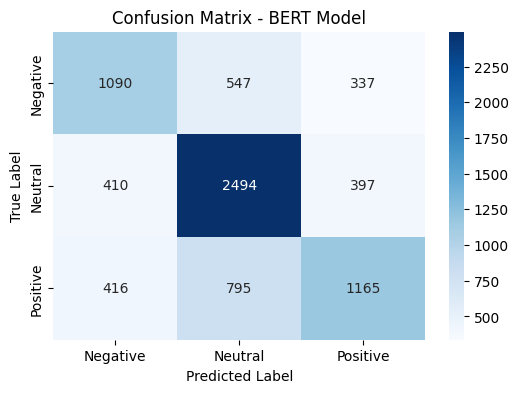

In [56]:
# Calculate confusion matrix for BERT model
conf_matrix_bert = confusion_matrix(y_test, y_test_pred_bert)

print("Confusion Matrix - Word2Vec Model:")
print(conf_matrix_bert)


# Plot confusion matrix for BERT model
plt.figure(figsize=(6, 4))
sns.heatmap(conf_matrix_bert, annot=True, fmt='d', cmap='Blues', 
            xticklabels=['Negative', 'Neutral', 'Positive'], 
            yticklabels=['Negative', 'Neutral', 'Positive'])
plt.title('Confusion Matrix - BERT Model')
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.show()

**Insights:**

* In the confusion matrix, we observe that the model performs relatively well in predicting the "neutral" class, as indicated by the high number of true positives (2494) and the relatively low number of false negative (410) and false positive (397).
* However, the model struggles more with the "negative" and "positive" classes. For example, in the "negative" class, there are fewer true positives (1090) compared to false positives (547) and false negatives (337), indicating that the model tends to incorrectly classify some negative instances as neutral or positive.
* Similarly, in the "positive" class, there are fewer true positives (1165) compared to false positives (795) and false negatives (416), suggesting that the model also tends to misclassify some positive instances as neutral or negative.

In [32]:
# Classification report for BERT model
report_bert = classification_report(y_test, y_test_pred_bert, output_dict=True, zero_division=1)
df_bert = pd.DataFrame(report_bert).transpose()
df_bert.index.name = 'BERT Model'

# Display DataFrames
print("\nBERT Model Report:")
display(df_bert)



BERT Model Report:


,precision,recall,f1-score,support
BERT Model,,,,
-1,0.568894,0.552178,0.560411,1974.000000
0,0.650156,0.755529,0.698893,3301.000000
1,0.613481,0.490320,0.545029,2376.000000
accuracy,0.620703,0.620703,0.620703,0.620703
macro avg,0.610844,0.599342,0.601445,7651.000000
weighted avg,0.617801,0.620703,0.615382,7651.000000


**Insights**

1. **Precision:** Precision measures the accuracy of the positive predictions. For the BERT model, the precision values for the classes -1, 0, and 1 are 0.569, 0.650, and 0.613, respectively. This indicates that the model's positive predictions are accurate to a certain extent, with class 0 having the highest precision.

2. **Recall:** Recall measures the ability of the classifier to correctly identify the true positives. The recall values for classes -1, 0, and 1 are 0.552, 0.756, and 0.490, respectively. This suggests that the model performs relatively well in recalling class 0 instances but struggles more with classes -1 and 1.

3. **F1-Score:** The F1-score is the harmonic mean of precision and recall, providing a balance between the two metrics. The F1-scores for classes -1, 0, and 1 are 0.560, 0.699, and 0.545, respectively. These scores indicate the overall effectiveness of the model in classifying each class, with class 0 having the highest F1-score.

### **5. Saving the Model with best Accuracy**

In [33]:
import pickle

with open('svm_tfidf.pkl', 'wb') as f:
    pickle.dump(svm_tfidf, f)

with open('tfidf_vectorizer.pkl', 'wb') as f:
    pickle.dump(tfidf_vectorizer, f)

* Here, I save the trained SVM model (svm_tfidf) to a file named 'svm_tfidf.pkl' using the pickle module. The SVM model has been trained using TF-IDF features.

* Saving the TF-IDF vectorizer (tfidf_vectorizer) to a file named 'tfidf_vectorizer.pkl' using the pickle module. The TF-IDF vectorizer has been used to transform the text data into TF-IDF features before feeding it into the SVM model for testing.